## Problem 3: Adding polynomial features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# function we wrote in class
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

In [2]:
# load the auto-mpg dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/auto.csv'
data = pd.read_csv(url)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


The data concerns city-cycle fuel consumption in miles per gallon (mpg).

**Part 1:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight}
$$

to the data.

In [16]:
m = len(data)
y = data['mpg'].to_numpy()
x = data['weight'].to_numpy()
X = build_poly_features(x,degree=1)
theta = np.linalg.lstsq(X,y,rcond=None)[0]

Plot the data points and the fitted model

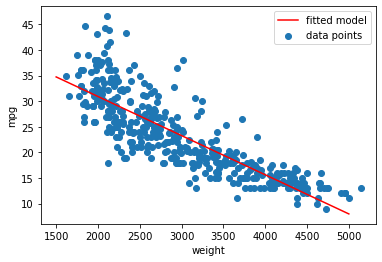

In [17]:
plt.scatter(data['weight'],data['mpg'],label='data points')
m_plot = 100
x_plot = np.linspace(1500,5000,m_plot)
X_plot = build_poly_features(x_plot,degree=1)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,color='red',label='fitted model')

plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()

**Part 2:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight} + \theta_2\cdot \mathrm{weight}^2
$$

to the data.

In [20]:
X = build_poly_features(x,degree=2)
theta = np.linalg.lstsq(X,y,rcond=None)[0]

Plot the data points and the fitted model

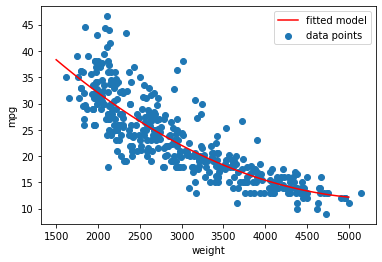

In [21]:
plt.scatter(data['weight'],data['mpg'],label='data points')
m_plot = 100
x_plot = np.linspace(1500,5000,m_plot)
X_plot = build_poly_features(x_plot,degree=2)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,color='red',label='fitted model')

plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()

**Part 3:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight} + \theta_2 \cdot \mathrm{horsepower}
$$

to the data.

In [22]:
X = data[['weight','horsepower']].to_numpy()
X = build_poly_features(X,degree=1)
theta = np.linalg.lstsq(X,y,rcond=None)[0]

Plot the data points and the fitted model

In [24]:
# horsepower range
X[:,2].max(),X[:,2].min()

(230.0, 46.0)

In [25]:
# weight range
# horsepower range
X[:,1].max(),X[:,1].min()

(5140.0, 1613.0)

Text(0.5, 0, 'mpg')

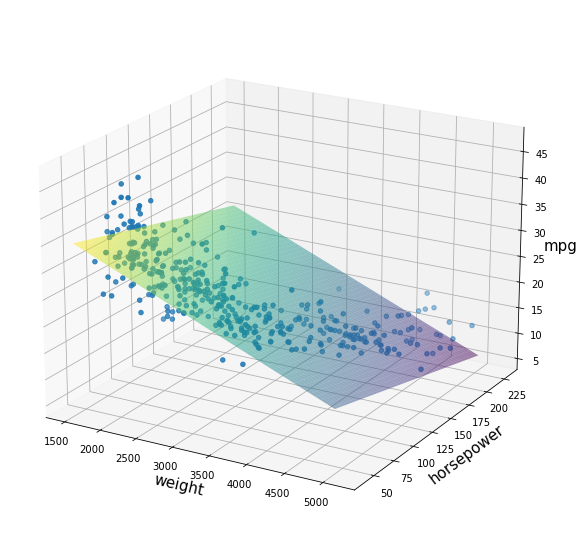

In [38]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# linear model
m_plot = 100
x1_plot = np.linspace(1500,5000,m_plot) # weight
x2_plot = np.linspace(40,230,m_plot) # horsepower
X1_plot,X2_plot = np.meshgrid(x1_plot,x2_plot)

X_plot = np.ones((m_plot*m_plot,2))
X_plot[:,0] = X1_plot.flatten()
X_plot[:,1] = X2_plot.flatten()
X_poly_plot = build_poly_features(X_plot,degree=1)
Y_plot = X_poly_plot.dot(theta).reshape((m_plot,m_plot))

ax.plot_surface(X1_plot,X2_plot,Y_plot,alpha=0.5,cmap='viridis')#,alpha=0.5,cmap='viridis',rstride=10, cstride=10)

# data points
ax.scatter(data['weight'],data['horsepower'],data['mpg'])

# change view
ax.view_init(elev=20)

# axis labels
ax.set_xlabel('weight',fontsize=15)
ax.set_ylabel('horsepower',fontsize=15)
ax.set_zlabel('mpg',fontsize=15)

**Part 3:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight} + \theta_2\cdot\mathrm{horsepower} + \theta_3\cdot\mathrm{weight}^2
+ \theta_4\cdot\mathrm{weight}\cdot\mathrm{horsepower} + \theta_5\cdot\mathrm{horsepower}^2
$$

to the data.

In [39]:
X = data[['weight','horsepower']].to_numpy()
X = build_poly_features(X,degree=2)
theta = np.linalg.lstsq(X,y,rcond=None)[0]

Plot the data points and the fitted model

Text(0.5, 0, 'mpg')

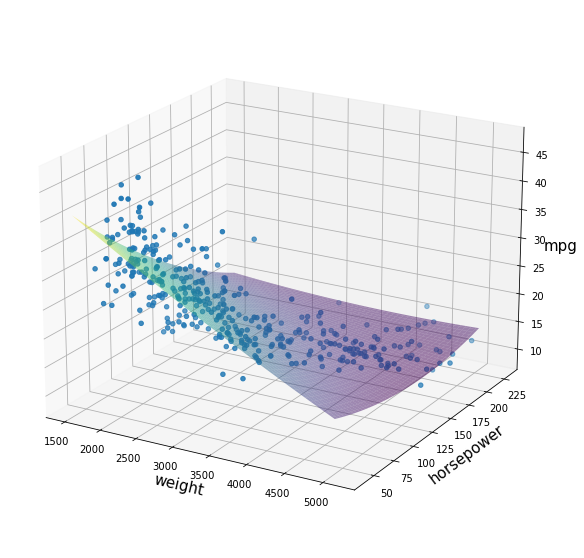

In [40]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# linear model
m_plot = 100
x1_plot = np.linspace(1500,5000,m_plot) # weight
x2_plot = np.linspace(40,230,m_plot) # horsepower
X1_plot,X2_plot = np.meshgrid(x1_plot,x2_plot)

X_plot = np.ones((m_plot*m_plot,2))
X_plot[:,0] = X1_plot.flatten()
X_plot[:,1] = X2_plot.flatten()
X_poly_plot = build_poly_features(X_plot,degree=2)
Y_plot = X_poly_plot.dot(theta).reshape((m_plot,m_plot))

ax.plot_surface(X1_plot,X2_plot,Y_plot,alpha=0.5,cmap='viridis')#,alpha=0.5,cmap='viridis',rstride=10, cstride=10)

# data points
ax.scatter(data['weight'],data['horsepower'],data['mpg'])

# change view
ax.view_init(elev=20)

# axis labels
ax.set_xlabel('weight',fontsize=15)
ax.set_ylabel('horsepower',fontsize=15)
ax.set_zlabel('mpg',fontsize=15)